In [ ]:
"""
Urun kumeleme ve analizi 
"""

"""
urun adi
fiyat
ortalama puan
mensei
"""

In [49]:
# %% rastgele urun verisi olusturma

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

np.random.seed(42)
num_samples = 100

# ozellikleri olusturma
fiyat = np.random.uniform(10,100,num_samples)
#plt.plot(fiyat)
ortalama_puan = np.random.uniform(1,5,num_samples)#ortalama puan 1-5
mensei = np.random.choice(["Ulke_A","Ulke_B,","Ulke_C","Ulke_D"],num_samples)
urun_adi = [f"Urun_(i)" for i in range(num_samples)]
data = pd.DataFrame({
    "urun_adi":urun_adi,
    "fiyat":fiyat,
    "ortalama_puan":ortalama_puan,
    "mensei":mensei
    })

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   urun_adi       100 non-null    object 
 1   fiyat          100 non-null    float64
 2   ortalama_puan  100 non-null    float64
 3   mensei         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB
None


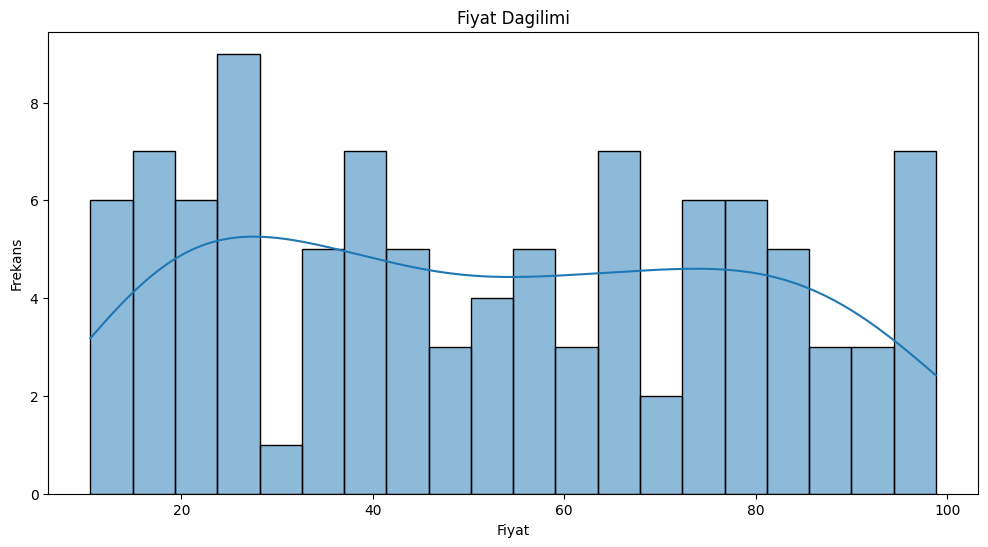

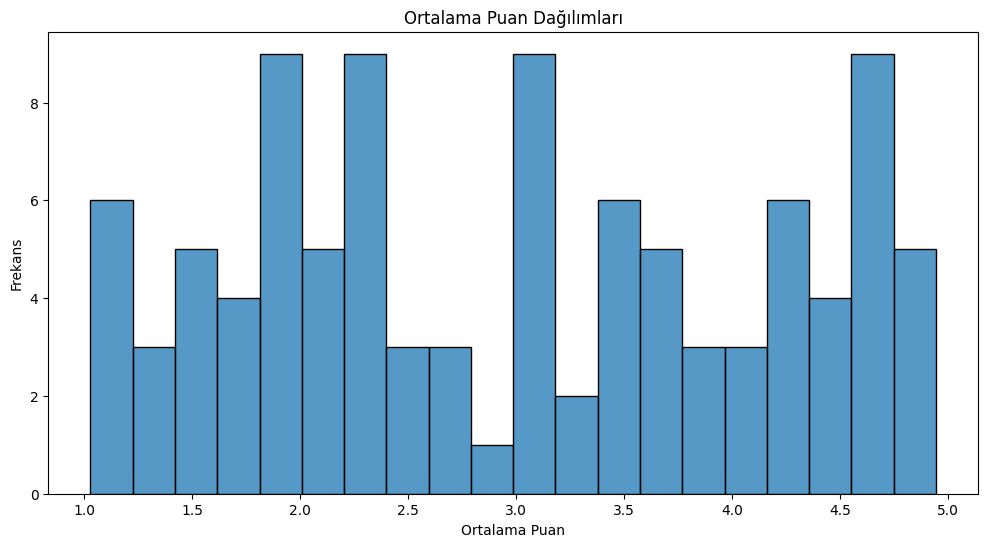

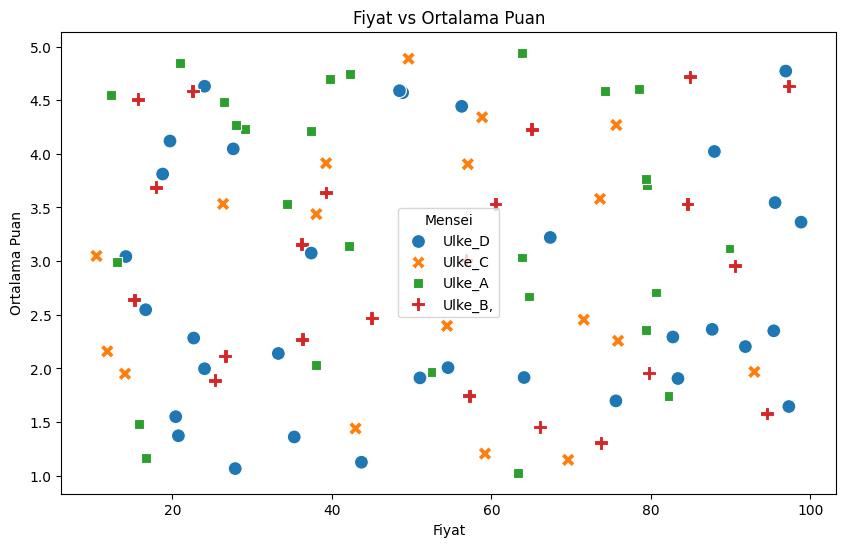

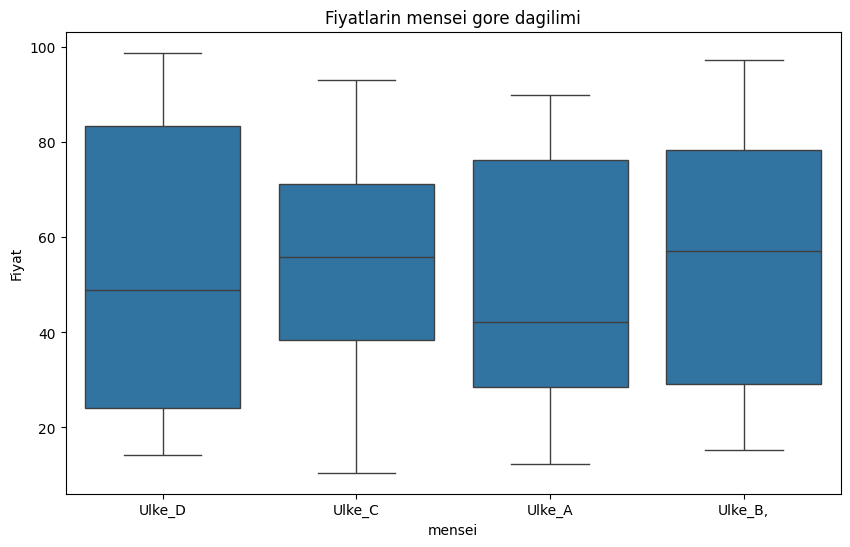

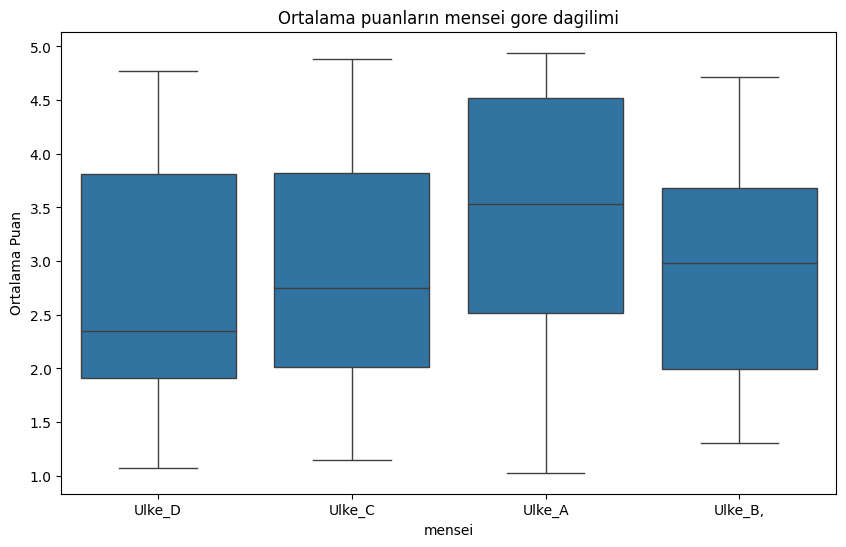

In [51]:
# %% temel veri analizi
describe = data.describe()
print(data.info())
"""
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   urun_adi       100 non-null    object 
 1   fiyat          100 non-null    float64
 2   ortalama_puan  100 non-null    float64
 3   mensei         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB
None
"""
#fiyat ve ortalama puan dağılımı
plt.figure(figsize = (12,6))
sns.histplot(data.fiyat, bins = 20, kde = True)
plt.title("Fiyat Dagilimi")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

plt.figure(figsize = (12,6))
sns.histplot(data.ortalama_puan,bins = 20, kde = False)
plt.title("Ortalama Puan Dağılımları")
plt.xlabel("Ortalama Puan")
plt.ylabel("Frekans")
plt.show()

# fiyat ve ortalama puan arasındaki ilişki
plt.figure(figsize = (10,6))
sns.scatterplot(x = "fiyat",y = "ortalama_puan",data=data,hue= "mensei", style = "mensei", s = 100)
plt.title("Fiyat vs Ortalama Puan")
plt.xlabel("Fiyat")
plt.ylabel("Ortalama Puan")
plt.legend(title = "Mensei")
plt.show()

#fiyatlarin mensei gore dagilimi
plt.figure(figsize = (10,6))
sns.boxplot(x="mensei",y="fiyat", data = data)
plt.title("Fiyatlarin mensei gore dagilimi")
plt.xlabel("mensei")
plt.ylabel("Fiyat")
plt.show()

#ortalama puanların mensei gore dagilimi
plt.figure(figsize = (10,6))
sns.boxplot(x="mensei",y="ortalama_puan", data = data)
plt.title("Ortalama puanların mensei gore dagilimi")
plt.xlabel("mensei")
plt.ylabel("Ortalama Puan")
plt.show()

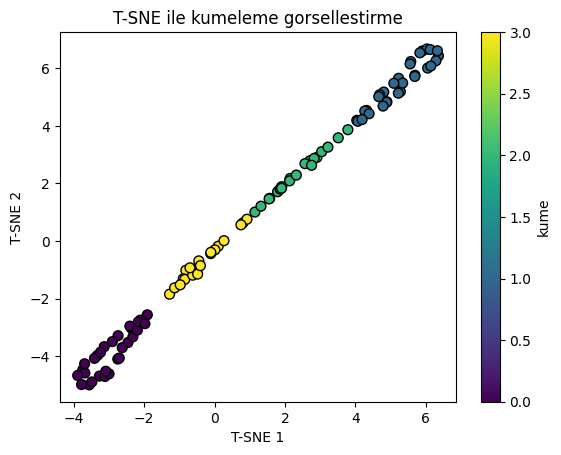

In [52]:
# %% kmeans kumeleme ve t-SNE gorsellestirme
X = data[["fiyat","ortalama_puan"]].values

# kmeans
kmeans = KMeans(n_clusters=4, random_state = 42)
data["kume"] = kmeans.fit_predict(X)

#T-SNE Gorsellestirme
tsne = TSNE(n_components = 2,random_state = 42)
X_tsne = tsne.fit_transform(X)

plt.figure()
plt.scatter(X_tsne[:,0],X_tsne[:,1],c = data["kume"],cmap = "viridis",marker = "o",edgecolors = "k", s = 50)
plt.title("T-SNE ile kumeleme gorsellestirme")
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
plt.colorbar(label = "kume")
plt.show()

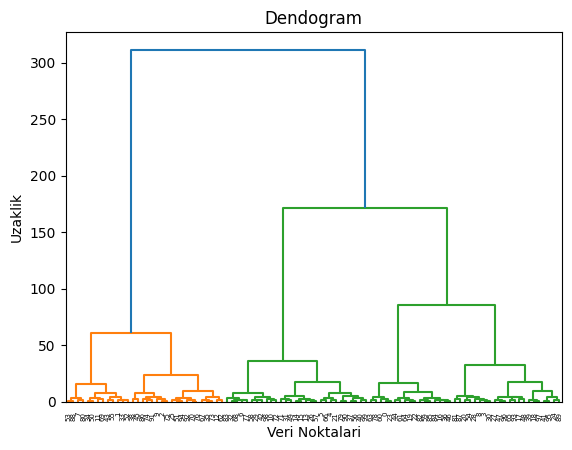

In [55]:
# %% dendogram iile gorsellestirme
linkage_matrix = linkage(X ,method = "ward")

plt.figure()
dendrogram(linkage_matrix)
plt.title("Dendogram")
plt.xlabel("Veri Noktalari")
plt.ylabel("Uzaklik")
plt.show()